<a href="https://colab.research.google.com/github/mineozcan/UMBC-DATA609-FALL24-WANG/blob/main/Assignments/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10/16/2024

In [110]:
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", None)

df = pd.read_csv("https://raw.githubusercontent.com/wcj365/python-stats-dataviz/refs/heads/master/fall2024/data/World_Development_Indicators_(WDI).csv")

print(df.shape)
df.sample(3)

(4123, 9)


,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
660,2018,Cameroon,1594.06011,61.180,25076747.0,CMR,Sub-Saharan Africa,Lower middle income,Blend
3478,2005,St. Martin (French part),NaN,77.555,33452.0,MAF,Latin America & Caribbean,High income,Not classified
293,2012,Bangladesh,876.81801,69.554,152090649.0,BGD,South Asia,Lower middle income,IDA


In [111]:
column_names_dict = {
    "GDP per capita (current US$)" : "GDP per Capita",
    "Life expectancy at birth, total (years)" : "Life Expectancy",
    "Population, total" : "Population"
}

df = df.rename(columns=column_names_dict)
df.sample(3)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type
3676,2013,Timor-Leste,1201.602507,66.440,1161555.0,TLS,East Asia & Pacific,Lower middle income,Blend
656,2014,Cameroon,1631.713985,58.935,22299585.0,CMR,Sub-Saharan Africa,Lower middle income,Blend
2854,2008,Palau,10380.269082,NaN,19102.0,PLW,East Asia & Pacific,Upper middle income,IBRD


In [112]:
df.sample(3).T

,2638,1510,3956
Year,2020,2013,2008
Country,Nepal,Guam,Uzbekistan
GDP per Capita,1139.189892,32318.890898,1082.286025
Life Expectancy,69.246,76.72,68.765
Population,29348627.0,167054.0,27302800.0
Country Code,NPL,GUM,UZB
Region,South Asia,East Asia & Pacific,Europe & Central Asia
Income Group,Lower middle income,High income,Lower middle income
Lending Type,IDA,Not classified,Blend


## Section One

Summary Statistics with describe() function

In [113]:
df[["Population","Life Expectancy"]].describe()

,Population,Life Expectancy
count,4.123000e+03,3777.000000
mean,3.319575e+07,71.060853
std,1.316430e+08,8.499806
min,9.791000e+03,42.125000
25%,7.436200e+05,65.351000
50%,5.872624e+06,72.765000
75%,2.148494e+07,77.529000
max,1.417173e+09,85.497561


In [114]:
df.describe()

,Year,GDP per Capita,Life Expectancy,Population
count,4123.00000,3962.000000,3777.000000,4.123000e+03
mean,2013.00000,17007.692848,71.060853,3.319575e+07
std,5.47789,25733.109164,8.499806,1.316430e+08
min,2004.00000,128.538423,42.125000,9.791000e+03
25%,2008.00000,1862.892400,65.351000,7.436200e+05
50%,2013.00000,6048.304202,72.765000,5.872624e+06
75%,2018.00000,22137.309568,77.529000,2.148494e+07
max,2022.00000,240862.182448,85.497561,1.417173e+09


In [115]:
df.describe(include="object")

,Country,Country Code,Region,Income Group,Lending Type
count,4123,4123,4123,4123,4123
unique,217,217,7,5,4
top,Afghanistan,AFG,Europe & Central Asia,High income,Not classified
freq,19,19,1102,1558,1387


In [116]:
df.describe(include="object").T

,count,unique,top,freq
Country,4123,217,Afghanistan,19
Country Code,4123,217,AFG,19
Region,4123,7,Europe & Central Asia,1102
Income Group,4123,5,High income,1558
Lending Type,4123,4,Not classified,1387


## Section Two

Compute quartiles and transform a numerical column into a categorical column based on the quartiles.

In [117]:
def assign_quartile(gdp):
    if gdp <= 1862.89:
        quartile = "1st Quartile (<=25%)"
    elif gdp > 1862.89 and gdp <= 6048.30:
        quartile = "2nd Quartile (25-50%)"
    elif gdp > 6048.30 and gdp <= 22137.31:
        quartile = "3rd Quartile (50-75%)"
    else:
        quartile = "4th Quartile (>75%)"
    return quartile


hungary = assign_quartile(14294.25)
hungary

'3rd Quartile (50-75%)'

In [118]:
df_usa = df[df["Country Code"] == "USA"]
df_usa

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type
3914,2004,United States,41724.631629,77.487805,292805298.0,USA,North America,High income,Not classified
3915,2005,United States,44123.407068,77.487805,295516599.0,USA,North America,High income,Not classified
3916,2006,United States,46302.000880,77.687805,298379912.0,USA,North America,High income,Not classified
3917,2007,United States,48050.223777,77.987805,301231207.0,USA,North America,High income,Not classified
3918,2008,United States,48570.045980,78.039024,304093966.0,USA,North America,High income,Not classified
3919,2009,United States,47194.943355,78.390244,306771529.0,USA,North America,High income,Not classified
3920,2010,United States,48650.643128,78.541463,309327143.0,USA,North America,High income,Not classified
3921,2011,United States,50065.966504,78.641463,311583481.0,USA,North America,High income,Not classified
3922,2012,United States,51784.418574,78.741463,313877662.0,USA,North America,High income,Not classified
3923,2013,United States,53291.127689,78.741463,316059947.0,USA,North America,High income,Not classified


In [119]:
assign_quartile(76329.58)

'4th Quartile (>75%)'

In [120]:
df_2020 = df[df["Year"] == 2020]
print(df_2020.shape[0])
print(f"There are {df_2020.shape[0]} countries in the 2020 dataset")
df_2020.sample(3)

217
There are 217 countries in the 2020 dataset


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type
2866,2020,Palau,14349.316819,NaN,17972.0,PLW,East Asia & Pacific,Upper middle income,IBRD
3132,2020,San Marino,45321.489223,NaN,34007.0,SMR,Europe & Central Asia,High income,Not classified
434,2020,Bhutan,3181.339747,71.609,772506.0,BTN,South Asia,Lower middle income,IDA


In [121]:
# Tuple
df_2020.shape

(217, 9)

## In-class Exercise

Create a new column call "GDP Quartile" in the df_2020 dataframe and assign each country the quartile it belongs to by applying the assign_quartile() function.


In [122]:
df_2020["GDP Quartile"] = df_2020["GDP per Capita"].apply(assign_quartile)

print(df_2020.shape[0])
print(df_2020["GDP Quartile"].value_counts())

217
GDP Quartile
4th Quartile (>75%)      61
2nd Quartile (25-50%)    58
3rd Quartile (50-75%)    54
1st Quartile (<=25%)     44
Name: count, dtype: int64


In [123]:
df_2020.sample(10)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP Quartile
35,2020,Albania,5343.037704,76.989000,2837849.0,ALB,Europe & Central Asia,Upper middle income,IBRD,2nd Quartile (25-50%)
3759,2020,Tunisia,3497.719027,75.292000,12161723.0,TUN,Middle East & North Africa,Lower middle income,IBRD,2nd Quartile (25-50%)
2866,2020,Palau,14349.316819,NaN,17972.0,PLW,East Asia & Pacific,Upper middle income,IBRD,3rd Quartile (50-75%)
643,2020,Cambodia,1577.911740,70.416000,16396860.0,KHM,East Asia & Pacific,Lower middle income,IDA,1st Quartile (<=25%)
3075,2020,Russian Federation,10194.441406,71.338780,144073139.0,RUS,Europe & Central Asia,Upper middle income,IBRD,3rd Quartile (50-75%)
3189,2020,Senegal,1492.475903,68.006000,16436120.0,SEN,Sub-Saharan Africa,Lower middle income,IDA,1st Quartile (<=25%)
3246,2020,Sierra Leone,493.432241,59.763000,8233970.0,SLE,Sub-Saharan Africa,Low income,IDA,1st Quartile (<=25%)
3892,2020,United Arab Emirates,37629.174169,78.946000,9287289.0,ARE,Middle East & North Africa,High income,Not classified,4th Quartile (>75%)
168,2020,Armenia,4505.867742,72.173000,2805608.0,ARM,Europe & Central Asia,Upper middle income,IBRD,2nd Quartile (25-50%)
3227,2020,Seychelles,12020.021064,77.236585,98462.0,SYC,Sub-Saharan Africa,High income,IBRD,3rd Quartile (50-75%)


In [124]:
df_4th = df_2020[df_2020["GDP Quartile"] == "4th Quartile (>75%)"]
df_4th.shape

(61, 10)

In [125]:
", ".join(list(df_4th["Country"]))

"Andorra, Aruba, Australia, Austria, Bahamas, The, Bahrain, Belgium, Bermuda, British Virgin Islands, Brunei Darussalam, Canada, Cayman Islands, Channel Islands, Cyprus, Czechia, Denmark, Eritrea, Estonia, Faroe Islands, Finland, France, Germany, Gibraltar, Greenland, Guam, Hong Kong SAR, China, Iceland, Ireland, Isle of Man, Israel, Italy, Japan, Korea, Dem. People's Rep., Korea, Rep., Kuwait, Liechtenstein, Luxembourg, Macao SAR, China, Malta, Monaco, Netherlands, New Caledonia, New Zealand, Norway, Portugal, Puerto Rico, Qatar, San Marino, Singapore, Sint Maarten (Dutch part), Slovenia, South Sudan, Spain, St. Martin (French part), Sweden, Switzerland, United Arab Emirates, United Kingdom, United States, Venezuela, RB, Virgin Islands (U.S.)"

In [126]:


quartile_groups = df_2020.groupby("GDP Quartile")["Country"].apply(list)


for quartile, countries in quartile_groups.items():
  print(f"{quartile}:")
  for country in countries:
      print(f"  - {country}")
  print("\n")

1st Quartile (<=25%):
  - Afghanistan
  - Angola
  - Benin
  - Burkina Faso
  - Burundi
  - Cambodia
  - Cameroon
  - Central African Republic
  - Chad
  - Comoros
  - Congo, Dem. Rep.
  - Ethiopia
  - Gambia, The
  - Guinea
  - Guinea-Bissau
  - Haiti
  - Kiribati
  - Kyrgyz Republic
  - Lesotho
  - Liberia
  - Madagascar
  - Malawi
  - Mali
  - Mauritania
  - Mozambique
  - Myanmar
  - Nepal
  - Niger
  - Pakistan
  - Rwanda
  - Senegal
  - Sierra Leone
  - Somalia
  - Sudan
  - Syrian Arab Republic
  - Tajikistan
  - Tanzania
  - Timor-Leste
  - Togo
  - Uganda
  - Uzbekistan
  - Yemen, Rep.
  - Zambia
  - Zimbabwe


2nd Quartile (25-50%):
  - Albania
  - Algeria
  - Armenia
  - Azerbaijan
  - Bangladesh
  - Belize
  - Bhutan
  - Bolivia
  - Botswana
  - Cabo Verde
  - Colombia
  - Congo, Rep.
  - Cote d'Ivoire
  - Djibouti
  - Ecuador
  - Egypt, Arab Rep.
  - El Salvador
  - Eswatini
  - Fiji
  - Georgia
  - Ghana
  - Guatemala
  - Honduras
  - India
  - Indonesia
  - Iran, Islamic

In [127]:
for quartile, countries in quartile_groups.items():
  print(f"{quartile}:")
  for country in countries:
      print(f"  - {country}")
  print("\n")

1st Quartile (<=25%):
  - Afghanistan
  - Angola
  - Benin
  - Burkina Faso
  - Burundi
  - Cambodia
  - Cameroon
  - Central African Republic
  - Chad
  - Comoros
  - Congo, Dem. Rep.
  - Ethiopia
  - Gambia, The
  - Guinea
  - Guinea-Bissau
  - Haiti
  - Kiribati
  - Kyrgyz Republic
  - Lesotho
  - Liberia
  - Madagascar
  - Malawi
  - Mali
  - Mauritania
  - Mozambique
  - Myanmar
  - Nepal
  - Niger
  - Pakistan
  - Rwanda
  - Senegal
  - Sierra Leone
  - Somalia
  - Sudan
  - Syrian Arab Republic
  - Tajikistan
  - Tanzania
  - Timor-Leste
  - Togo
  - Uganda
  - Uzbekistan
  - Yemen, Rep.
  - Zambia
  - Zimbabwe


2nd Quartile (25-50%):
  - Albania
  - Algeria
  - Armenia
  - Azerbaijan
  - Bangladesh
  - Belize
  - Bhutan
  - Bolivia
  - Botswana
  - Cabo Verde
  - Colombia
  - Congo, Rep.
  - Cote d'Ivoire
  - Djibouti
  - Ecuador
  - Egypt, Arab Rep.
  - El Salvador
  - Eswatini
  - Fiji
  - Georgia
  - Ghana
  - Guatemala
  - Honduras
  - India
  - Indonesia
  - Iran, Islamic

In [128]:
df_2020 = df_2020.dropna()
df_2020["GDP (Rounded)"] = df_2020["GDP per Capita"].apply(round)
df_2020.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP Quartile,GDP (Rounded)
985,2020,Cyprus,28281.425781,81.391,1237537.0,CYP,Europe & Central Asia,High income,Not classified,4th Quartile (>75%),28281
2239,2020,"Macao SAR, China",37474.734595,85.184,676283.0,MAC,East Asia & Pacific,High income,Not classified,4th Quartile (>75%),37475
3816,2020,Turks and Caicos Islands,20882.261270,75.001,44276.0,TCA,Latin America & Caribbean,High income,Not classified,3rd Quartile (50-75%),20882
1365,2020,"Gambia, The",704.030463,62.612,2573995.0,GMB,Sub-Saharan Africa,Low income,IDA,1st Quartile (<=25%),704
149,2020,Argentina,8500.837939,75.892,45376763.0,ARG,Latin America & Caribbean,Upper middle income,IBRD,3rd Quartile (50-75%),8501


In [129]:
def pop_million(pop):
    return pop / 1000000


df_2020["Population (Million)"] = df_2020["Population"].apply(pop_million)

df_2020.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP Quartile,GDP (Rounded),Population (Million)
3170,2020,Saudi Arabia,20398.060987,76.239,35997107.0,SAU,Middle East & North Africa,High income,Not classified,3rd Quartile (50-75%),20398,35.997107
1612,2020,Haiti,1283.141228,64.052,11306801.0,HTI,Latin America & Caribbean,Lower middle income,IDA,1st Quartile (<=25%),1283,11.306801
4025,2020,Viet Nam,3586.347176,75.378,96648685.0,VNM,East Asia & Pacific,Lower middle income,IBRD,2nd Quartile (25-50%),3586,96.648685
1232,2020,Ethiopia,918.652594,65.371,117190911.0,ETH,Sub-Saharan Africa,Low income,IDA,1st Quartile (<=25%),919,117.190911
2011,2020,Kosovo,4310.934002,76.567,1790133.0,XKX,Europe & Central Asia,Upper middle income,IDA,2nd Quartile (25-50%),4311,1.790133


In [130]:
df_2020["Population2 (Million)"] = df_2020["Population"].apply(lambda pop : pop / 1000000)
df_2020.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP Quartile,GDP (Rounded),Population (Million),Population2 (Million)
2011,2020,Kosovo,4310.934002,76.567,1790133.0,XKX,Europe & Central Asia,Upper middle income,IDA,2nd Quartile (25-50%),4311,1.790133,1.790133
1517,2020,Guam,34780.861662,76.612,169231.0,GUM,East Asia & Pacific,High income,Not classified,4th Quartile (>75%),34781,0.169231,0.169231
833,2020,Comoros,1519.586780,64.166,806166.0,COM,Sub-Saharan Africa,Lower middle income,IDA,1st Quartile (<=25%),1520,0.806166,0.806166
3949,2020,Uruguay,15650.499303,78.430,3429086.0,URY,Latin America & Caribbean,High income,IBRD,3rd Quartile (50-75%),15650,3.429086,3.429086
3645,2020,Tanzania,1104.164429,66.408,61704518.0,TZA,Sub-Saharan Africa,Lower middle income,IDA,1st Quartile (<=25%),1104,61.704518,61.704518


## Homework Question 1

Save the summary statistics of all numerical columns and all categorical columns to only one Excel spreadsheet file with two worksheets, one for numerical and one for categorical columns.

In [131]:
# Makes an Excel workbook with sheets, 'Numerical' and 'Categorical', and they
# contain numerical and categorical summary statistics, respectively.
with pd.ExcelWriter('summary_stats.xlsx') as writer:
    df.describe().to_excel(writer, sheet_name='Numerical')
    df.describe(include='object').to_excel(writer, sheet_name='Categorical')

## Homework Question 2

Create a new column that is the GDP per Capita rounded to 2 decimal points by using the Python's build function "round"
Hint: apply the round function/method and provide a parameter 2.

In [132]:
# Replaces the 'GDP per Capita' column with a new column with the GDP values
# rounded to (2) decimal places.
df['GDP per Capita 2'] = df['GDP per Capita'].apply(lambda gdp: round(gdp, 2))
df.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2
1022,2019,Denmark,59592.980689,81.451220,5814422.0,DNK,Europe & Central Asia,High income,Not classified,59592.98
2993,2014,Portugal,22103.700970,81.121951,10401062.0,PRT,Europe & Central Asia,High income,Not classified,22103.70
2303,2008,Maldives,6743.130963,76.543000,336883.0,MDV,South Asia,Upper middle income,IDA,6743.13
717,2018,Central African Republic,435.932297,54.369000,5094780.0,CAF,Sub-Saharan Africa,Low income,IDA,435.93
809,2015,Colombia,6228.651622,76.257000,47119728.0,COL,Latin America & Caribbean,Upper middle income,IBRD,6228.65


In [133]:
def round_gdp(gdp, dec):
    return round(gdp, dec)


df['GDP per Capita 3'] = df['GDP per Capita'].apply(round_gdp, args=(5,))
df.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3
337,2018,Belarus,6360.053101,74.17561,9438785.0,BLR,Europe & Central Asia,Upper middle income,IBRD,6360.05,6360.05310
726,2008,Chad,936.494137,49.02400,11098664.0,TCD,Sub-Saharan Africa,Low income,IDA,936.49,936.49414
503,2013,Brazil,12258.565709,73.91800,201721767.0,BRA,Latin America & Caribbean,Upper middle income,IBRD,12258.57,12258.56571
2370,2018,Marshall Islands,4771.359204,64.50000,45989.0,MHL,East Asia & Pacific,Upper middle income,IDA,4771.36,4771.35920
2144,2020,Liberia,597.529692,60.94800,5087584.0,LBR,Sub-Saharan Africa,Low income,IDA,597.53,597.52969


## Homework Question 3 (bonus, will cover next week)

step 1 - create a column "Life Expectancy Quartile" similar to the GDP per Capita Quartile above.
Step 2 - Create a column "health and wealth status" based on the following definition
- rich and healthy (1st GDP per capita quartile and 1st life expentancy quartile)
- poor and unhealthy ((4th GDP per capita quartile and 4th life expentancy quartile)
- rich and unhealthy (1st GDP per capita quartile and 4th life expentancy quartile)
- poor and healthy ((4th GDP per capita quartile and 1st life expentancy quartile)
- Other

In [134]:
print(df.shape)
df.sample(5)

(4123, 11)


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3
3928,2018,United States,62823.309438,78.639024,326838199.0,USA,North America,High income,Not classified,62823.31,62823.30944
1615,2004,Honduras,1201.247505,69.796000,7383407.0,HND,Latin America & Caribbean,Lower middle income,IDA,1201.25,1201.24750
1649,2019,"Hong Kong SAR, China",48359.001195,85.180488,7507900.0,HKG,East Asia & Pacific,High income,Not classified,48359.00,48359.00120
2236,2017,"Macao SAR, China",78896.274749,84.563000,638609.0,MAC,East Asia & Pacific,High income,Not classified,78896.27,78896.27475
3158,2008,Saudi Arabia,18944.857349,75.274000,27437353.0,SAU,Middle East & North Africa,High income,Not classified,18944.86,18944.85735


In [135]:
df_2020 = df[df["Year"] == 2020]
print(df_2020.shape)
df_2020.sample(5)

(217, 11)


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3
2125,2020,Lesotho,917.356381,54.693000,2254100.0,LSO,Sub-Saharan Africa,Lower middle income,IDA,917.36,917.35638
1194,2020,Estonia,23595.243684,78.595122,1329522.0,EST,Europe & Central Asia,High income,Not classified,23595.24,23595.24368
2752,2020,Nigeria,2074.613747,52.887000,208327405.0,NGA,Sub-Saharan Africa,Lower middle income,Blend,2074.61,2074.61375
928,2020,Croatia,14269.908855,77.724390,4047680.0,HRV,Europe & Central Asia,High income,IBRD,14269.91,14269.90885
3322,2020,Slovenia,25558.429054,80.531707,2102419.0,SVN,Europe & Central Asia,High income,Not classified,25558.43,25558.42905


In [136]:
df_2020 = df_2020.dropna(subset=["GDP per Capita", "Life Expectancy"])
df_2020.shape

(202, 11)

In [137]:
# Step 1: Creates 'Life Expectancy Quartile' column and lists the quartile the row falls under.
df_2020['Life Expectancy'].describe()



,Life Expectancy
count,202.000000
mean,72.314599
std,7.451962
min,52.777000
25%,66.779750
50%,72.871500
75%,77.981750
max,85.497561


In [138]:
x = df_2020['Life Expectancy'].describe()['25%']
y = df_2020['Life Expectancy'].describe()['50%']
z = df_2020['Life Expectancy'].describe()['75%']

In [139]:
def assign_quartile_life(life_exp, x, y, z):
    if life_exp <= x:
        quartile = "1st Quartile (<=25%)"
    elif life_exp > x and life_exp <= y:
        quartile = "2nd Quartile (25-50%)"
    elif life_exp > y and life_exp <= z:
        quartile = "3rd Quartile (50-75%)"
    else:
        quartile = "4th Quartile (>75%)"
    return quartile

df_2020['Life Expectancy Quartile'] = df_2020['Life Expectancy'].apply(assign_quartile_life, args=(x, y, z,))
df_2020.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile
814,2020,Colombia,5304.289129,74.76900,50930662.0,COL,Latin America & Caribbean,Upper middle income,IBRD,5304.29,5304.28913,3rd Quartile (50-75%)
1099,2020,Ecuador,5645.199290,72.15300,17588595.0,ECU,Latin America & Caribbean,Upper middle income,IBRD,5645.20,5645.19929,2nd Quartile (25-50%)
2353,2020,Malta,29597.636163,82.34878,515332.0,MLT,Middle East & North Africa,High income,Not classified,29597.64,29597.63616,4th Quartile (>75%)
3189,2020,Senegal,1492.475903,68.00600,16436120.0,SEN,Sub-Saharan Africa,Lower middle income,IDA,1492.48,1492.47590,2nd Quartile (25-50%)
1764,2020,Iraq,4251.337253,69.12300,42556984.0,IRQ,Middle East & North Africa,Upper middle income,IBRD,4251.34,4251.33725,2nd Quartile (25-50%)


In [140]:
x = df_2020['GDP per Capita'].describe()['25%']
y = df_2020['GDP per Capita'].describe()['50%']
z = df_2020['GDP per Capita'].describe()['75%']

print(x, y, z)

2188.047693164725 5920.260418960404 20761.21119943435


In [141]:
# Step 2: Creates 'GDP Quartile' column and lists the quartile the row falls under.
# Next, creates 'Health and Wealth Status' column which categorizes a row if
# a country and a year falls under (4) different categories.

def assign_quartile(gdp, x, y, z):
  if gdp < x:
    quartile = '1st Quartile (<=25%)'
  elif gdp > x and gdp <= y:
    quartile = '2nd Quartile (25-50%)'
  elif gdp > y and gdp <= z:
    quartile = '3rd Quartile (50-75%)'
  else:
    quartile = '4th Quartile (>75%)'
  return quartile

df_2020['GDP Quartile'] =  df_2020['GDP per Capita'].apply(assign_quartile, args=(x, y, z,))
df_2020.sample(10)


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile,GDP Quartile
1118,2020,"Egypt, Arab Rep.",3571.556907,70.990,107465134.0,EGY,Middle East & North Africa,Lower middle income,IBRD,3571.56,3571.55691,2nd Quartile (25-50%),2nd Quartile (25-50%)
2600,2020,Namibia,4252.041720,62.829,2489098.0,NAM,Sub-Saharan Africa,Upper middle income,IBRD,4252.04,4252.04172,1st Quartile (<=25%),2nd Quartile (25-50%)
2372,2020,Marshall Islands,5545.600267,64.977,43413.0,MHL,East Asia & Pacific,Upper middle income,IDA,5545.60,5545.60027,1st Quartile (<=25%),2nd Quartile (25-50%)
1213,2020,Eswatini,3372.904610,59.692,1180655.0,SWZ,Sub-Saharan Africa,Lower middle income,IBRD,3372.90,3372.90461,1st Quartile (<=25%),2nd Quartile (25-50%)
2144,2020,Liberia,597.529692,60.948,5087584.0,LBR,Sub-Saharan Africa,Low income,IDA,597.53,597.52969,1st Quartile (<=25%),1st Quartile (<=25%)
301,2020,Bangladesh,2233.305901,71.968,167420951.0,BGD,South Asia,Lower middle income,IDA,2233.31,2233.30590,2nd Quartile (25-50%),2nd Quartile (25-50%)
871,2020,"Congo, Rep.",2011.269479,63.785,5702174.0,COG,Sub-Saharan Africa,Lower middle income,Blend,2011.27,2011.26948,1st Quartile (<=25%),1st Quartile (<=25%)
3284,2020,Sint Maarten (Dutch part),29223.069615,74.584,42310.0,SXM,Latin America & Caribbean,High income,Not classified,29223.07,29223.06962,3rd Quartile (50-75%),4th Quartile (>75%)
3968,2020,Uzbekistan,1759.307471,70.331,34232050.0,UZB,Europe & Central Asia,Lower middle income,Blend,1759.31,1759.30747,2nd Quartile (25-50%),1st Quartile (<=25%)
1954,2020,Kiribati,1403.993853,67.266,126463.0,KIR,East Asia & Pacific,Lower middle income,IDA,1403.99,1403.99385,2nd Quartile (25-50%),1st Quartile (<=25%)


In [142]:
def find_status(row):
  if (row['Life Expectancy Quartile'] == "1st Quartile (<=25%)") and (row['GDP Quartile'] == "1st Quartile (<=25%)"):
    return 'Poor and unhealthy'
  elif (row['Life Expectancy Quartile'] == "4th Quartile (>75%)") and (row['GDP Quartile'] == "1st Quartile (<=25%)"):
    return 'Poor but healthy'
  elif (row['Life Expectancy Quartile'] == "4th Quartile (>75%)") and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'Rich and healthy'
  elif (row['Life Expectancy Quartile'] == "3rd Quartile (50-75%)") and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'Rich and somewhat healthy'
  elif (row['Life Expectancy Quartile'] == "2nd Quartile (25-50%)") and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'Rich and somewhat unhealthy'
  elif (row['Life Expectancy Quartile'] == "1st Quartile (<=25%)") and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'Rich but unhealthy'
  else:
    return 'Other'

df_2020['Health and Wealth Status'] = df_2020.apply(find_status,axis=1)
df_2020.sample(10)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile,GDP Quartile,Health and Wealth Status
1099,2020,Ecuador,5645.199290,72.153000,17588595.0,ECU,Latin America & Caribbean,Upper middle income,IBRD,5645.20,5645.19929,2nd Quartile (25-50%),2nd Quartile (25-50%),Other
1023,2020,Denmark,60836.592412,81.602439,5831404.0,DNK,Europe & Central Asia,High income,Not classified,60836.59,60836.59241,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
491,2020,Botswana,5875.070606,65.647000,2546402.0,BWA,Sub-Saharan Africa,Upper middle income,IBRD,5875.07,5875.07061,1st Quartile (<=25%),2nd Quartile (25-50%),Other
415,2020,Bermuda,107791.886435,81.136000,63893.0,BMU,North America,High income,Not classified,107791.89,107791.88644,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
1802,2020,Isle of Man,79530.605484,80.588000,84046.0,IMN,Europe & Central Asia,High income,Not classified,79530.61,79530.60548,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
3436,2020,Sri Lanka,3852.389091,76.393000,21919000.0,LKA,South Asia,Lower middle income,IDA,3852.39,3852.38909,3rd Quartile (50-75%),2nd Quartile (25-50%),Other
3322,2020,Slovenia,25558.429054,80.531707,2102419.0,SVN,Europe & Central Asia,High income,Not classified,25558.43,25558.42905,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
1403,2020,Germany,46749.476228,81.041463,83160871.0,DEU,Europe & Central Asia,High income,Not classified,46749.48,46749.47623,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
662,2020,Cameroon,1539.130545,60.833000,26491087.0,CMR,Sub-Saharan Africa,Lower middle income,Blend,1539.13,1539.13055,1st Quartile (<=25%),1st Quartile (<=25%),Poor and unhealthy
3303,2020,Slovak Republic,19552.091110,76.865854,5458827.0,SVK,Europe & Central Asia,High income,Not classified,19552.09,19552.09111,3rd Quartile (50-75%),3rd Quartile (50-75%),Other


In [143]:
df_2020["Health and Wealth Status"].value_counts()

,count
Health and Wealth Status,
Other,113
Rich and healthy,42
Poor and unhealthy,38
Rich and somewhat healthy,7
Rich and somewhat unhealthy,2


# Countries that belong to each status category.

In [144]:
df_rich_healthy = df_2020[df_2020["Health and Wealth Status"] == "Rich and healthy"]
print(df_rich_healthy.shape)
df_rich_healthy.sample(5)

(42, 14)


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile,GDP Quartile,Health and Wealth Status
4044,2020,Virgin Islands (U.S.),39411.045254,79.819512,106290.0,VIR,Latin America & Caribbean,High income,Not classified,39411.05,39411.04525,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
985,2020,Cyprus,28281.425781,81.391000,1237537.0,CYP,Europe & Central Asia,High income,Not classified,28281.43,28281.42578,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
3569,2020,Sweden,52837.903978,82.356098,10353442.0,SWE,Europe & Central Asia,High income,Not classified,52837.90,52837.90398,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
3037,2020,Qatar,52315.660078,79.099000,2760385.0,QAT,Middle East & North Africa,High income,Not classified,52315.66,52315.66008,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
1840,2020,Italy,31922.919163,82.195122,59438851.0,ITA,Europe & Central Asia,High income,Not classified,31922.92,31922.91916,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy


In [145]:
df_rich_healthy["Country"].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Bermuda', 'Canada',
       'Channel Islands', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Faroe Islands', 'Finland', 'France', 'Germany',
       'Hong Kong SAR, China', 'Iceland', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Liechtenstein',
       'Luxembourg', 'Macao SAR, China', 'Malta', 'Netherlands',
       'New Caledonia', 'New Zealand', 'Norway', 'Portugal',
       'Puerto Rico', 'Qatar', 'Singapore', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'Virgin Islands (U.S.)'], dtype=object)

In [146]:
df_poor_unhealthy = df_2020[df_2020["Health and Wealth Status"] == "Poor and unhealthy"]
print(df_poor_unhealthy.shape)
df_poor_unhealthy["Country"].unique()

(38, 14)


array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Ethiopia', 'Gambia, The',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda',
       'Sierra Leone', 'Somalia', 'Sudan', 'Tanzania', 'Togo', 'Uganda',
       'Yemen, Rep.', 'Zambia', 'Zimbabwe'], dtype=object)

In [147]:
df_poor_healthy = df_2020[df_2020["Health and Wealth Status"] == "Poor but healthy"]
print(df_poor_healthy.shape)
df_poor_healthy["Country"].unique()

(0, 14)


array([], dtype=object)

In [148]:
df_rich_unhealthy = df_2020[df_2020["Health and Wealth Status"] == "Rich but unhealthy"]
print(df_rich_unhealthy.shape)
df_rich_unhealthy["Country"].unique()

(0, 14)


array([], dtype=object)

In [149]:
df_rich_unhealthy

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile,GDP Quartile,Health and Wealth Status


In [150]:
df_other = df_2020[df_2020["Health and Wealth Status"] == "Other"]
df_other["Country"].nunique()

113

# Choropleth - Chorom (colorful), pleth -map, place.

Plot population of countries over a map using plotly

In [151]:
# Create the plot
fig = px.choropleth(
    df_2020,
    locations="Country",
    locationmode='country names',
    color="Health and Wealth Status",
    hover_name="Country",
#    color_continuous_scale=px.colors.sequential.Inferno
)

# Show the plot
fig.show()

## Home work Question 1:
Following what we did in class, further break down the category of poor countries and use additional statuses:

- Poor and somewhat healthy
- Poor and somewhat unhealthy

Then make the choropleth plot.

In [155]:
def find_status_full(row):
  if (row['Life Expectancy Quartile'] == "1st Quartile (<=25%)") and (row['GDP Quartile'] == "1st Quartile (<=25%)"):
    return 'unhealthy and poor'
  elif (row['Life Expectancy Quartile'] == "1st Quartile (<=25%)") and (row['GDP Quartile'] == '2nd Quartile (25-50%)'):
    return 'unhealthy and somewhat poor'
  elif (row['Life Expectancy Quartile'] == "1st Quartile (<=25%)") and (row['GDP Quartile'] == '3rd Quartile (50-75%)'):
    return 'unhealthy and somewhat rich'
  elif (row['Life Expectancy Quartile'] == "1st Quartile (<=25%)") and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'unhealthy and rich'
  elif (row['Life Expectancy Quartile'] == "2nd Quartile (25-50%)") and (row['GDP Quartile'] == "1st Quartile (<=25%)"):
    return 'somewhat unhealthy and poor'
  elif (row['Life Expectancy Quartile'] == '2nd Quartile (25-50%)') and (row['GDP Quartile'] == '2nd Quartile (25-50%)'):
    return 'somewhat unhealthy and somewhat poor'
  elif (row['Life Expectancy Quartile'] == '2nd Quartile (25-50%)') and (row['GDP Quartile'] == '3rd Quartile (50-75%)'):
    return 'somewhat unhealthy but somewhat rich'
  elif (row['Life Expectancy Quartile'] == '2nd Quartile (25-50%)') and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'somewhat unhealthy but rich'
  elif (row['Life Expectancy Quartile'] == '3rd Quartile (50-75%)') and (row['GDP Quartile'] == "1st Quartile (<=25%)"):
    return 'somewhat healthy but poor'
  elif (row['Life Expectancy Quartile'] == '3rd Quartile (50-75%)') and (row['GDP Quartile'] == '2nd Quartile (25-50%)'):
    return 'somewhat healthy but somewhat poor'
  elif (row['Life Expectancy Quartile'] == '3rd Quartile (50-75%)') and (row['GDP Quartile'] == '3rd Quartile (50-75%)'):
    return 'somewhat healthy but somewhat rich'
  elif (row['Life Expectancy Quartile'] == '3rd Quartile (50-75%)') and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'somewhat healthy and rich'
  elif (row['Life Expectancy Quartile'] == "4th Quartile (>75%)") and (row['GDP Quartile'] == "1st Quartile (<=25%)"):
    return 'healthy but poor'
  elif (row['Life Expectancy Quartile'] == "4th Quartile (>75%)") and (row['GDP Quartile'] == '2nd Quartile (25-50%)'):
    return 'healthy but somewhat poor'
  elif (row['Life Expectancy Quartile'] == "4th Quartile (>75%)") and (row['GDP Quartile'] == '3rd Quartile (50-75%)'):
    return 'healthy and somewhat rich'
  elif (row['Life Expectancy Quartile'] == "4th Quartile (>75%)") and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'healthy and rich'
  else:
    return 'Other'

In [156]:
df_2020['Health and Wealth Status'] = df_2020.apply(find_status_full, axis=1)

# Create new plot
fig2 = px.choropleth(
    df_2020,
    locations="Country",
    locationmode='country names',
    color="Health and Wealth Status",
    hover_name="Country",
)

# Show the plot
fig2.show()

# Home work question 2:

Think of ways to avoid/eliminate the possibility of typos that cause the calculation issues. How to make your program more robust and less error-prong.

In [ ]:
# Install flake8
pip install flake8

# Run flake8 on your Python file
flake8 your_script.py

# test_calculations.py
import unittest

def add(a, b):
  return a + b

class TestCalculations(unittest.TestCase):
  def test_add(self):
      self.assertEqual(add(2, 3), 5)

if __name__ == '__main__':
  unittest.main()


  # Example of PEP 8 style
def calculate_area(radius):
  pi = 3.14159
  return pi * radius ** 2


  def divide(a, b):
  try:
      return a / b
  except ZeroDivisionError:
      return "Cannot divide by zero"

print(divide(10, 0))  # Output: Cannot divide by zero

# .github/workflows/python-app.yml
name: Python application

on: [push]

jobs:
  build:
    runs-on: ubuntu-latest
    steps:
    - uses: actions/checkout@v2
    - name: Set up Python
      uses: actions/setup-python@v2
      with:
        python-version: '3.x'
    - name: Install dependencies
      run: |
        python -m pip install --upgrade pip
        pip install flake8
        pip install -r requirements.txt
    - name: Lint with flake8
      run: |
        flake8 .
    - name: Test with unittest
      run: |
        python -m unittest discover

In [ ]:
# Basic Git commands
git init
git add .
git commit -m "Initial commit"
git push origin main

In [ ]:
# Using type hints
def greet(name: str) -> str:
    return f"Hello, {name}!"

# Using mypy for type checking
# Install mypy
pip install mypy

# Run mypy
mypy your_script.py

In [ ]:
def calculate_area(radius):
  """
  Calculate the area of a circle given its radius.

  :param radius: The radius of the circle
  :return: The area of the circle
  """
  pi = 3.14159
  return pi * radius ** 2

In [ ]:
def calc(x, y):
  return x * y + 2 * x - y

In [ ]:
def calculate_expression(x, y):
  product = x * y
  double_x = 2 * x
  return product + double_x - y

## Home work question 3

Find a dataset of your interest and use Jupyter Notebook to explore the dataset step by step including summary stats and data viz.

In [167]:
import pandas as pd

url = 'https://raw.githubusercontent.com/mineozcan/UMBC-DATA609-FALL24-WANG/main/Assignments/DataScience_salaries_2024.csv?raw=true'

df = pd.read_csv(url)

print(df.head())

   work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   

  company_location company_size  
0   

In [168]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

print(df.head())

   work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   

  company_location company_size  
0   

In [169]:
# Get a summary of the DataFrame
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Get information about the DataFrame
print(df.info())

          work_year        salary  salary_in_usd  remote_ratio
count  14838.000000  1.483800e+04   14838.000000  14838.000000
mean    2023.138900  1.650227e+05  149874.718763     32.760480
std        0.700799  3.562354e+05   69009.181349     46.488278
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.021000e+05  102000.000000      0.000000
50%     2023.000000  1.422000e+05  141300.000000      0.000000
75%     2024.000000  1.875000e+05  185900.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 

<Axes: title={'center': 'Salary Distribution'}, ylabel='Frequency'>

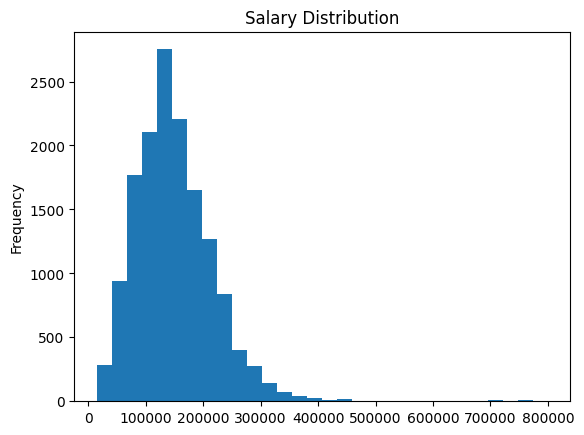

In [170]:
# Plot a histogram for a specific column
df['salary_in_usd'].plot(kind='hist', bins=30, title='Salary Distribution')

<Axes: title={'center': 'salary_in_usd'}, xlabel='job_title'>

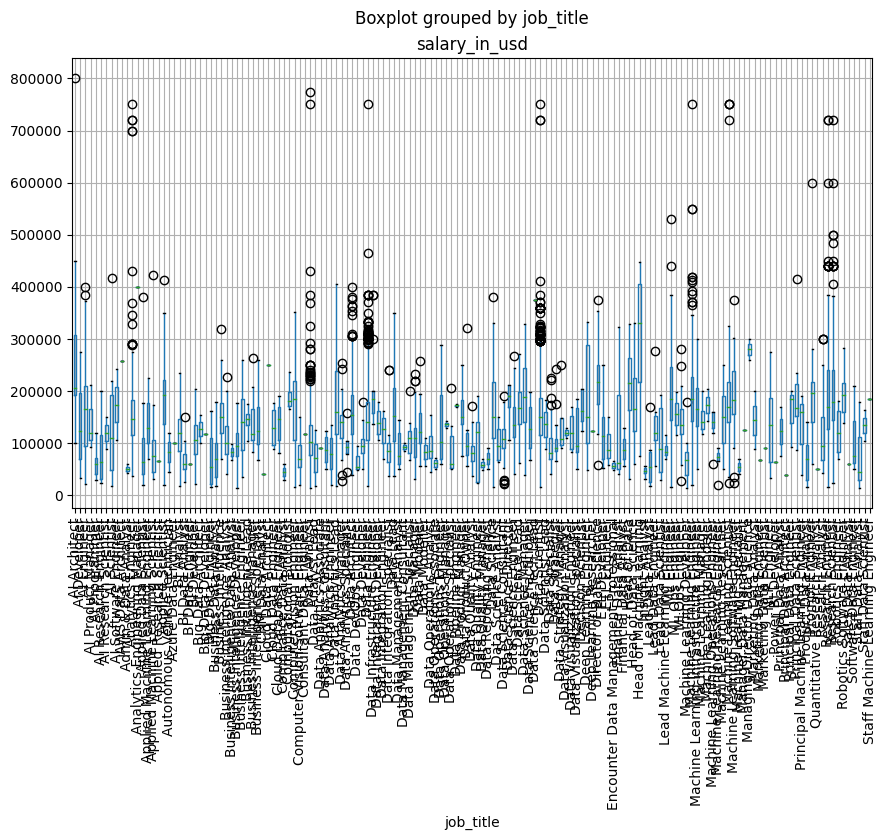

In [171]:
# Box plot for salary by job title
df.boxplot(column='salary_in_usd', by='job_title', figsize=(10, 6), rot=90)

<Axes: title={'center': 'Job Title Counts'}, xlabel='job_title'>

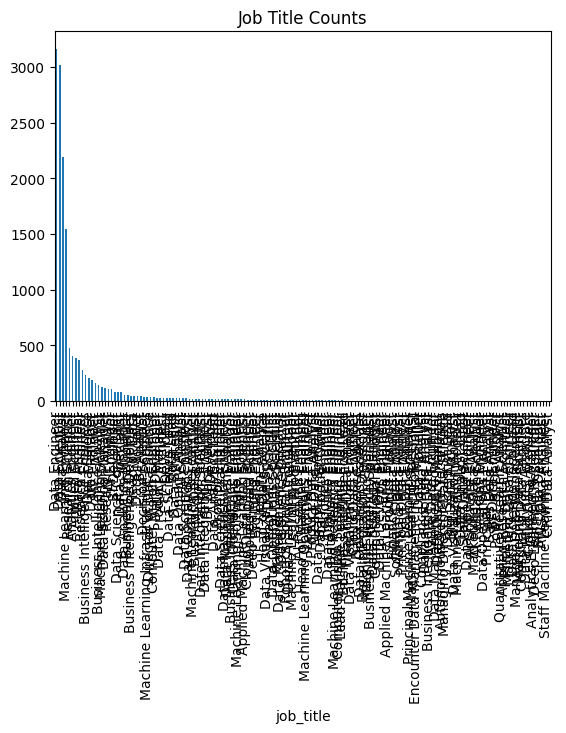

In [172]:
# Bar plot for job title counts
df['job_title'].value_counts().plot(kind='bar', title='Job Title Counts')

In [173]:
import pandas as pd

url = 'https://raw.githubusercontent.com/mineozcan/UMBC-DATA609-FALL24-WANG/main/Assignments/DataScience_salaries_2024.csv?raw=true'

df = pd.read_csv(url)

print(df.head())

   work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   

  company_location company_size  
0   

In [174]:
import pandas as pd

url = 'https://raw.githubusercontent.com/mineozcan/UMBC-DATA609-FALL24-WANG/main/Assignments/DataScience_salaries_2024.csv?raw=true'

df = pd.read_csv(url)

sample_table = df.head(5)
print(sample_table.to_string(index=False))

 work_year experience_level employment_type                      job_title   salary salary_currency  salary_in_usd employee_residence  remote_ratio company_location company_size
      2021               MI              FT                 Data Scientist 30400000             CLP          40038                 CL           100               CL            L
      2021               MI              FT                BI Data Analyst 11000000             HUF          36259                 HU            50               US            L
      2020               MI              FT                 Data Scientist 11000000             HUF          35735                 HU            50               HU            L
      2021               MI              FT                    ML Engineer  8500000             JPY          77364                 JP            50               JP            S
      2022               SE              FT Lead Machine Learning Engineer  7500000             INR          9

In [175]:
import pandas as pd

url = 'https://raw.githubusercontent.com/mineozcan/UMBC-DATA609-FALL24-WANG/main/Assignments/DataScience_salaries_2024.csv?raw=true'
df = pd.read_csv(url)

average_salary_per_job = df.groupby('job_title')['salary_in_usd'].mean().reset_index()

average_salary_per_job = average_salary_per_job.sort_values(by='salary_in_usd', ascending=False)

print(average_salary_per_job.to_string(index=False))

                               job_title  salary_in_usd
           Analytics Engineering Manager  399880.000000
                  Data Science Tech Lead  375000.000000
                Head of Machine Learning  299758.428571
          Managing Director Data Science  280000.000000
                      AWS Data Architect  258000.000000
                            AI Architect  255142.357143
                    Cloud Data Architect  250000.000000
                Director of Data Science  218775.333333
                            Head of Data  210013.714286
            Data Infrastructure Engineer  207332.812500
                         Prompt Engineer  205093.588235
                     Data Analytics Lead  198241.944444
                             ML Engineer  197496.711656
              Robotics Software Engineer  196625.000000
                      Research Scientist  194217.117895
                Principal Data Scientist  194089.600000
              Machine Learning Scientist  192214

In [177]:
import pandas as pd
import plotly.express as px

url = 'https://raw.githubusercontent.com/mineozcan/UMBC-DATA609-FALL24-WANG/main/Assignments/DataScience_salaries_2024.csv?raw=true'
df = pd.read_csv(url)

average_salary_per_job = df.groupby('job_title')['salary_in_usd'].mean().reset_index()

average_salary_per_job = average_salary_per_job.sort_values(by='salary_in_usd', ascending=True)

fig = px.bar(
  average_salary_per_job,
  x='salary_in_usd',
  y='job_title',
  orientation='h',
  title='Average Salary per Job Title (Ascending Order)',
  labels={'salary_in_usd': 'Average Salary (USD)', 'job_title': 'Job Title'},
  height=800
)

fig.update_layout(
  yaxis=dict(title='Job Title'),
  xaxis=dict(title='Average Salary (USD)'),
  margin=dict(l=150, r=50, t=50, b=50)
)

fig.show()